# Mini-Batch Gradient Descent Algorithm

## Objetivo
Implementar y analizar el algoritmo Mini-Batch Gradient Descent para problemas de regresión lineal

### **Mini-Batch Gradient Descent**
- **Descripción**: Utiliza un subconjunto pequeño (mini-batch) de muestras para calcular el gradiente
- **Ventajas**: 
  - Balance entre velocidad y estabilidad
  - Aprovecha vectorización para eficiencia computacional
  - Convergencia más suave que SGD
- **Desventajas**: 
  - Requiere ajustar el tamaño del batch
  - Puede requerir más iteraciones que Batch GD

In [42]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

Forma de X: (1000, 1)
Forma de y: (1000, 1)
Forma de X_b: (1000, 2)


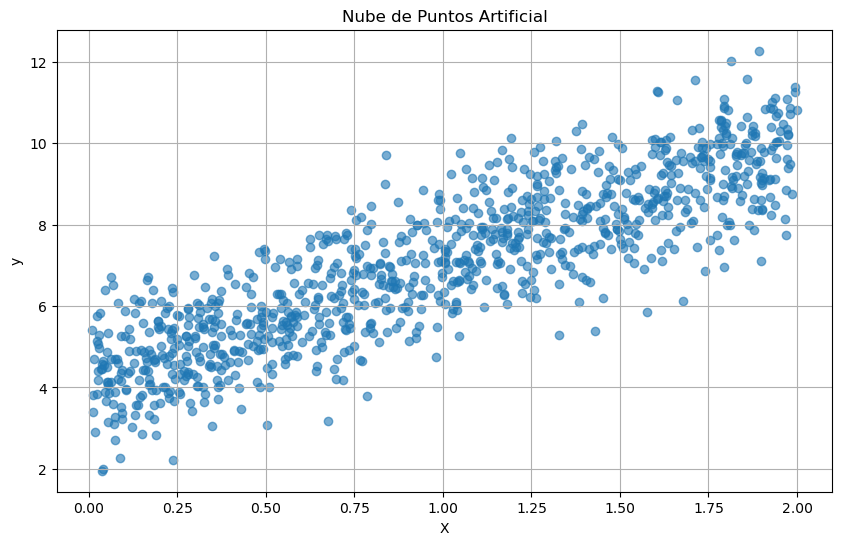

In [43]:
# 1. Generación de datos artificiales (nube de puntos)
np.random.seed(42)
m = 1000  # número de muestras
X = 2 * np.random.rand(m, 1)  # feature
y = 4 + 3 * X + np.random.randn(m, 1)  # target con ruido

# Añadir columna de 1s para el término de sesgo (bias)
X_b = np.c_[np.ones((m, 1)), X]  # forma (m, 2)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Forma de X_b: {X_b.shape}")

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nube de Puntos Artificial')
plt.grid(True)
plt.show()

In [44]:
# 2. Función de costo (Mean Squared Error)
def compute_cost(X, y, theta):
    """
    Calcula el costo usando Mean Squared Error
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, theta, batch_size=None):
    """
    Calcula el gradiente para la función de costo
    """
    m = len(y) if batch_size is None else batch_size
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

In [51]:
# 3. Implementación de Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=32, random_state=42):
    """
    Implementa Mini-Batch Gradient Descent
    
    Parámetros:
    - X: matriz de features con columna de bias
    - y: vector target
    - learning_rate: tasa de aprendizaje
    - n_iterations: número de épocas
    - batch_size: tamaño del mini-batch
    - random_state: semilla para reproducibilidad
    
    Retorna:
    - theta: parámetros optimizados
    - cost_history: historial de costos por época
    - time_elapsed: tiempo de ejecución
    """
    np.random.seed(random_state)
    m, n = X.shape
    theta = np.random.randn(n, 1)  # inicialización aleatoria
    cost_history = []
    
    start_time = time.time()
    
    for epoch in range(n_iterations):
        # Barajar los datos al inicio de cada época
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Procesar mini-batches
        for i in range(0, m, batch_size):
            # Obtener mini-batch
            end_idx = min(i + batch_size, m)
            X_batch = X_shuffled[i:end_idx]
            y_batch = y_shuffled[i:end_idx]
            
            # Calcular gradiente para el mini-batch
            gradient = compute_gradient(X_batch, y_batch, theta, len(X_batch))
            
            # Actualizar parámetros
            theta = theta - learning_rate * gradient
        
        # Calcular y almacenar el costo de toda la época
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    time_elapsed = time.time() - start_time
    
    return theta, cost_history, time_elapsed

📊 Entrenando Mini-Batch Gradient Descent...

📋 Resultados del entrenamiento:
Mini-Batch GD - Parámetros finales: θ₀=4.1751, θ₁=2.9265

Tiempos de ejecución:
Mini-Batch GD: 0.0471 segundos

🎯 Parámetros reales: θ₀=4.0000, θ₁=3.0000


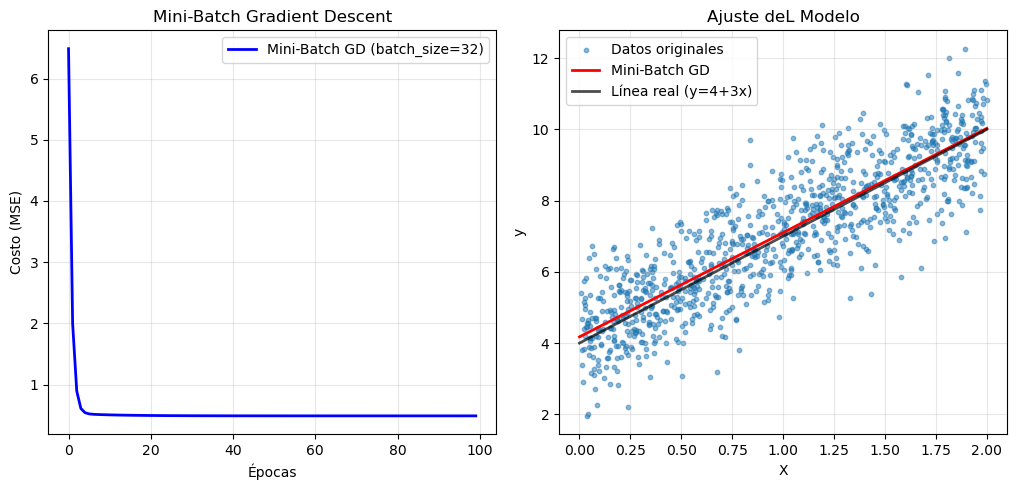

In [52]:

# Hiperparámetros
learning_rate = 0.01
n_iterations = 100
batch_size = 32

# Entrenar Mini-Batch Gradient Descent
print("📊 Entrenando Mini-Batch Gradient Descent...")
theta_mb, cost_history_mb, time_mb = mini_batch_gradient_descent(
    X_b, y, learning_rate, n_iterations, batch_size
)

print("\n📋 Resultados del entrenamiento:")
print(f"Mini-Batch GD - Parámetros finales: θ₀={theta_mb[0][0]:.4f}, θ₁={theta_mb[1][0]:.4f}")
print(f"\nTiempos de ejecución:")
print(f"Mini-Batch GD: {time_mb:.4f} segundos")

# Parámetros reales (conocidos): y = 4 + 3*X
print(f"\n🎯 Parámetros reales: θ₀=4.0000, θ₁=3.0000")

# 5. Visualización: Función de costo vs iteraciones
plt.figure(figsize=(15, 5))

# Subplot 2: Focus en Mini-Batch GD
plt.subplot(1, 3, 2)
plt.plot(cost_history_mb, 'b-', linewidth=2, label=f'Mini-Batch GD (batch_size={batch_size})')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.title('Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Ajuste final con Mini-Batch GD
plt.subplot(1, 3, 3)
plt.scatter(X, y, alpha=0.5, s=10, label='Datos originales')
x_plot = np.linspace(0, 2, 100).reshape(-1, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]
y_pred_mb = x_plot_b.dot(theta_mb)
y_pred_batch = x_plot_b.dot(theta_batch)
y_pred_sgd = x_plot_b.dot(theta_sgd)

plt.plot(x_plot, y_pred_mb, 'r-', linewidth=2, label=f'Mini-Batch GD')
plt.plot(x_plot, 4 + 3*x_plot, 'k-', linewidth=2, alpha=0.7, label='Línea real (y=4+3x)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste deL Modelo')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()